In [2]:
# Note: this project has inspiration  from 
# https://thecleverprogrammer.com/2020/05/20/heart-disease-prediction-with-machine-learning/

# Machine Learning and Artificial Intelligence Research:  
### Predictions of Heart Disease

## Table of contents (click to skip to the section)
* [Introduction](#introduction_heart)
  * [Background / Problem](#background_problem)
* [Data](#data_heart)
  * [Import the Data](#pulldata_heart)
  * [Exploration (Missing Values, Data Dispersion, Data Types)](#evaluate_heart) 
    * [Correlation Matrix](#corr_matrix_heart) 
    * [Review Dataset Balance](#data_balance_heart)     
  * [Data Processing and Preparation](#dataprep_heart)
  * [Set Classification Target Values](#setclasstarget_heart)
  * [Perform One Hot Encoding](#onehot_heart)
  * [Scale / Normalize (for continuous features)](#normalize_heart)
  * [Set Train / Test Splits](#train_test_heart)
* [Methodology - Supervised Learning: Classification](#method_class_heart)
  * [K-Nearest Neighbors](#knn_heart)
  * [Random Forest](#randomforest_heart)
* [Conclusion](#conclusion_heart)



## Introduction <a name="introduction_heart"></a>

### Background / Problem <a name="background_problem"></a>

According to the Centers for Disease Control and Prevention:
* Heart disease is the leading cause of death for men, women, and people of most racial and ethnic groups in the United States.
* One person dies every 34 seconds in the United States from cardiovascular disease.
* About 697,000 people in the United States died from heart disease in 2020—that’s 1 in every 5 deaths.
* Heart disease cost the United States about $229 billion each year from 2017 to 2018. This includes the cost of health care services, medicines, and lost productivity due to death.

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data <a name="data_heart"></a>

### Import the Data <a name="pulldata_heart"></a>

In [36]:
import_path = r'C:\Users\jboyce\Desktop\programming stuff\portfolio work\ML-heart'
import_filename = r'heart.csv'
import_path_and_filename = import_path + '\\' + import_filename

In [37]:
df = pd.read_csv(import_path_and_filename)

In [38]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Exploration (Missing Values, Data Dispersion, Data Types) <a name="evaluate"></a>

In [39]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [40]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Correlation Matrix <a name="corr_matrix_heart"></a>

In [42]:
import seaborn as sns
corrmat = df.corr()
top_corr_features = corrmat.index
#plt.figure(figsize=(32,32)) # this figure was too small
plt.rcParams["figure.figsize"] = (16,11)
# plt.figure()

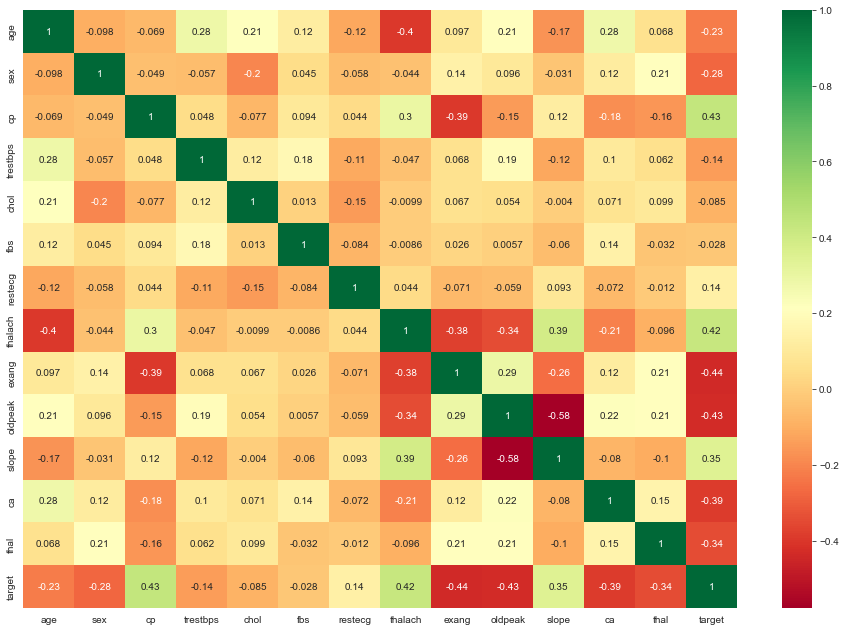

In [43]:
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")
plt.show()

### Review Dataset Balance <a name="data_balance_heart"></a>

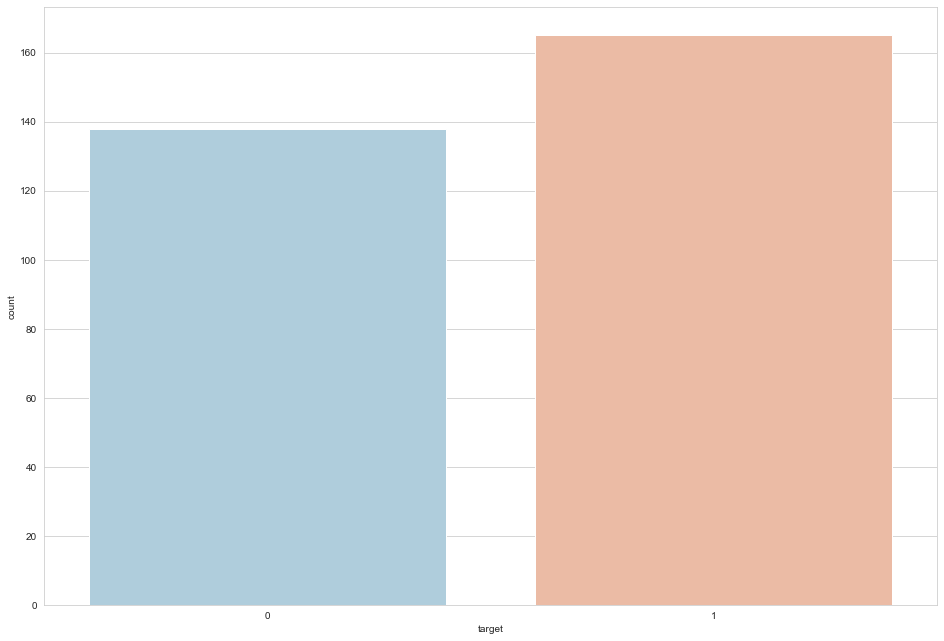

In [44]:
# Check allocation balancing  of target classes
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')
plt.show()

### Data Processing and Preparation <a name="dataprep_heart"></a>

In [45]:
# Data processing
# determine cateogorical variables
list_categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

In [46]:
print(len(list_categorical))

8


One hot encoding is just applicable to categorical data, 
<br/>so there is no need to "normalize" what is already categorical. 
<br/>Although, the rest of your numerical data should be normalized

In [48]:
# perform one-hot encoding
dataset = pd.get_dummies(df, columns = list_categorical)

In [49]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [50]:
# normalize data (except onehot encoding)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [51]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [52]:
dataset.shape

(303, 31)

In [53]:
y = dataset['target']
X = dataset.drop(['target'], axis = 1)
indices = X.index

### Set Train / Test Splits <a name="train_test_heart"></a>

In [54]:
# est the train/test splits (70 / 30 train/test)
# using the list comprehensions created earlier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(X, y, indices, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Train set (indices):', indices_train)
print ('Test set:', X_test.shape,  y_test.shape)
print ('Test set (indices): ', indices_test)

Train set: (212, 30) (212,)
Train set (indices): Int64Index([221, 244,  99, 184,  48, 134, 272,  55,  19, 177,
            ...
             44, 164,  94, 109, 252,  58,  87, 197, 174, 122],
           dtype='int64', length=212)
Test set: (91, 30) (91,)
Test set (indices):  Int64Index([113, 249,  18, 142, 299, 270, 294, 162,  13,  24, 117,  80,   6,
            205,  63, 195,  47,  45, 238, 188, 157, 116, 279, 152,  70, 178,
            298,  14,  92, 251, 235,  33, 123,  61, 228, 128,  46,  43, 172,
            295, 220, 274, 257,  84,  68, 155, 284, 239, 226, 112, 224,   1,
            101,  91,  12, 124,  64, 133, 204, 180,  11, 100,  39, 230, 185,
            277, 175,  16, 245, 211,  42, 296,  71, 153,  69, 241, 182, 118,
             83, 106, 129, 103, 282,  88, 300, 130,  93, 139, 215, 281, 137],
           dtype='int64')


## Methodology - Supervised Learning: Classification <a name="method_class_heart"></a>

### K-Nearest Neighbors <a name="knn_heart"></a>

In [55]:
# for k-means, also show the elbow method, but KNN is shown here
# https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f
# re-run with train-test splits - PENDING
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier,X,y,cv=10)
    knn_scores.append(score.mean())

In [56]:
knn_scores[:]

[0.7455913978494624,
 0.7591397849462365,
 0.8120430107526883,
 0.8053763440860215,
 0.8348387096774192,
 0.831505376344086,
 0.8416129032258064,
 0.8417204301075267,
 0.8449462365591398,
 0.8448387096774193,
 0.8381720430107527,
 0.8448387096774195,
 0.841505376344086,
 0.8415053763440861,
 0.8280645161290323,
 0.8381720430107527,
 0.8280645161290323,
 0.8249462365591398,
 0.821505376344086,
 0.8250537634408601]

In [57]:
# confirm number of knn scores
len(knn_scores)

20

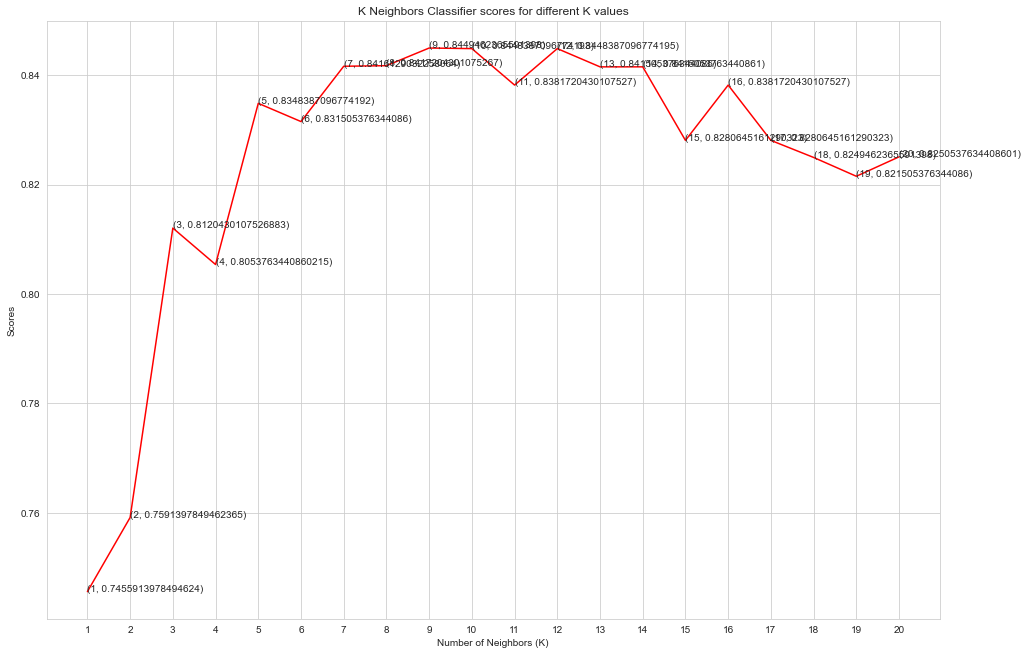

In [58]:
#re-run with train-test splits - PENDING
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')
plt.show()

In [59]:
# it looks like 12 is the max with 10 and 9 being close

In [60]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,X,y,cv=10)
score.mean()

0.8448387096774195

In [61]:
# Random Forest Classifier
# from sklearn.ensemble import RandomForestClassifier
# randomforest_classifier= RandomForestClassifier(n_estimators=10)
# score=cross_val_score(randomforest_classifier,X,y,cv=10)
# score.mean()
# result was 0.7986021505376344

### Random Forest <a name="randomforest_heart"></a>

In [62]:
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier = RandomForestClassifier(n_estimators=100, random_state=0)
score=cross_val_score(randomforest_classifier,X,y,cv=10)
score.mean()

0.8346236559139785

In [63]:
score

array([0.90322581, 0.83870968, 0.87096774, 0.93333333, 0.76666667,
       0.83333333, 0.8       , 0.83333333, 0.76666667, 0.8       ])

## Conclusion <a name="conclusion_heart"></a>

While the results from the random forest classifier were better than the KNN classifer, there is still room for improvement. Future improvements to this model may include comparisons with other supervised learning classification algorithms (such as SVMs, Neural Networks,  Bayesian networks, etc.). In addition, we can attempt to optimize and fine-tune the parameters of the existing models.